In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/home/Student/Desktop/210962124/Week 4/gold_prices.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'gold_prices.csv'

In [114]:
x = np.array(df['Year'].values).reshape(-1,1)
y = np.array(df['Price'].values)

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                 test_size=0.1,random_state=0)

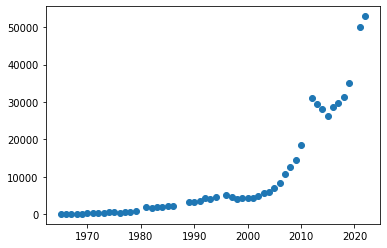

In [115]:
plt.scatter(x_train,y_train)

Polynomial degree :  4
RMSE : 3957.914356159503


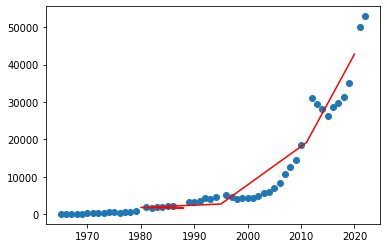

In [116]:
rmses = []
degrees = np.arange(1, 5)
min_rmse, min_deg = 1e10, 0

for deg in degrees:
    poly_features = PolynomialFeatures(degree=deg)
    X = poly_features.fit_transform(x_train)
    model = LinearRegression()
    model.fit(X, y_train)

    X_new = poly_features.transform(x_test)
    y_pred = model.predict(X_new)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmses.append(rmse)
    
    if min_rmse > rmse:
        min_rmse = rmse
        min_deg = deg

        
print('Polynomial degree : ',min_deg)
plt.scatter(x_train, y_train, label='Original Data')
plt.plot(x_test, y_pred, 'r-', label='Polynomial Regression')
print('RMSE :',rmse)

In [117]:
r_sq = model.score(X_new, y_test)
print('Score : ',r_sq)

Score :  0.9491771286126455
